In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os   

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
raw_data=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
df=raw_data.copy()
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [58]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


<h1>Check for Null and duplicated Values</h1>

In [60]:
df.duplicated().sum()

0

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no null values

<h1>Exploratory Data Analysis(EDA)</h1>

In [63]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

There are only two genders

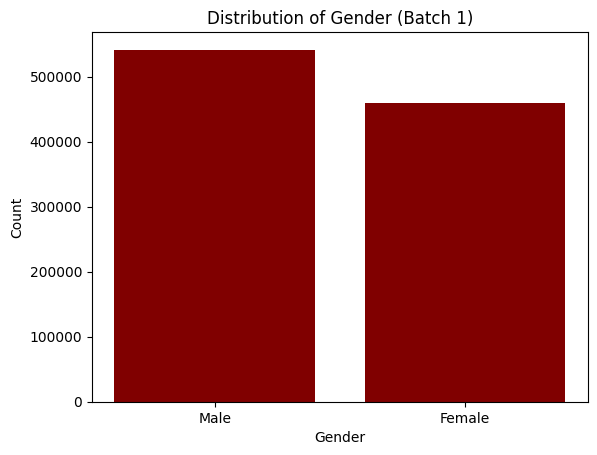

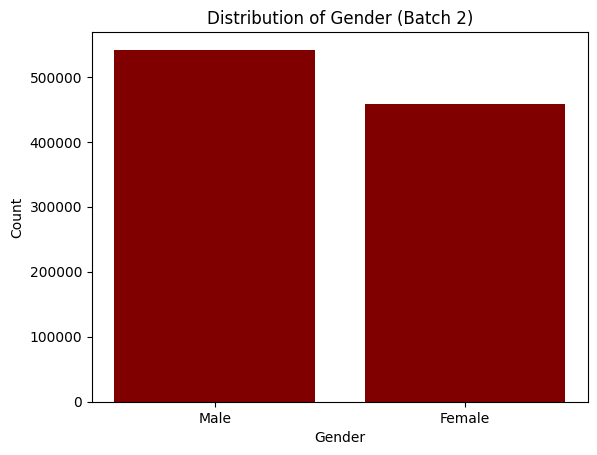

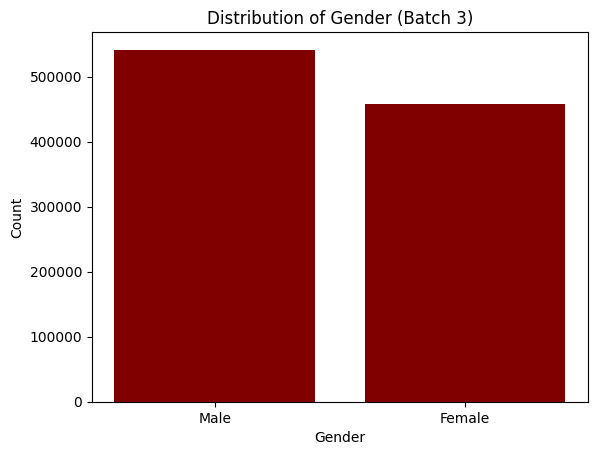

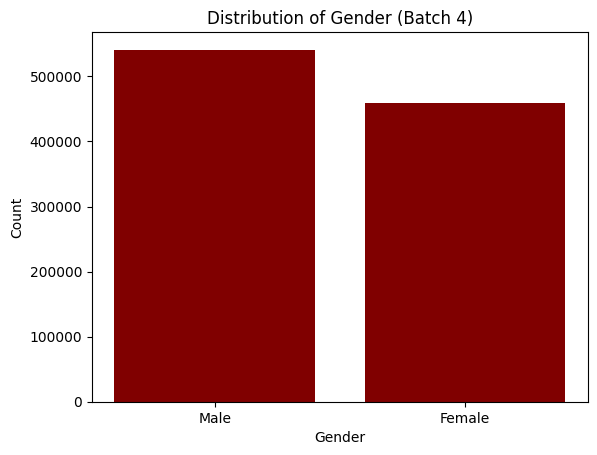

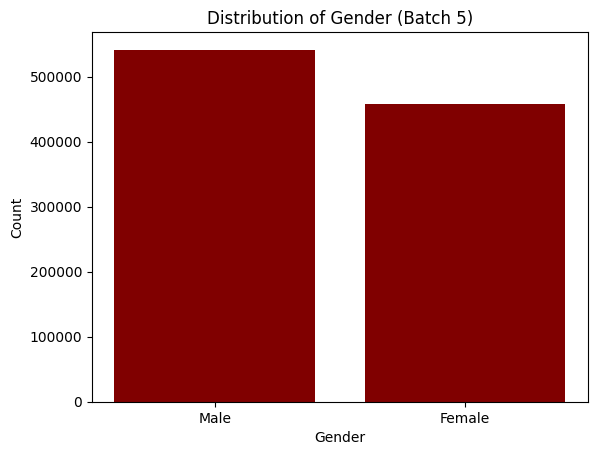

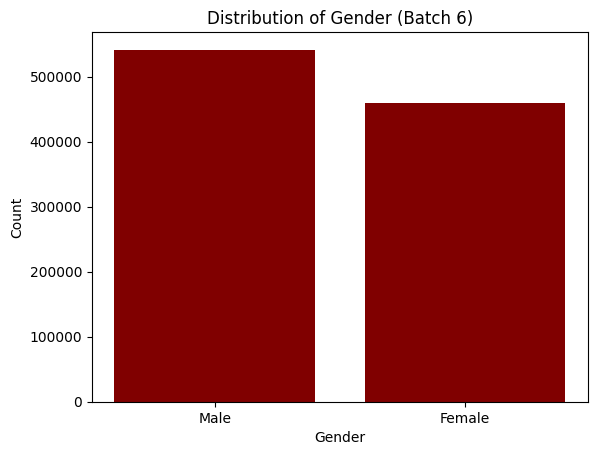

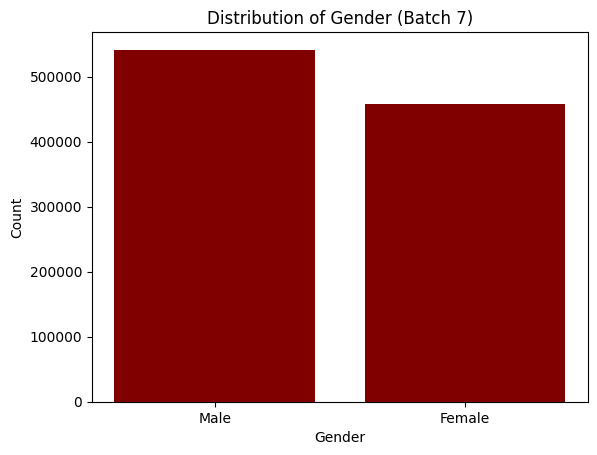

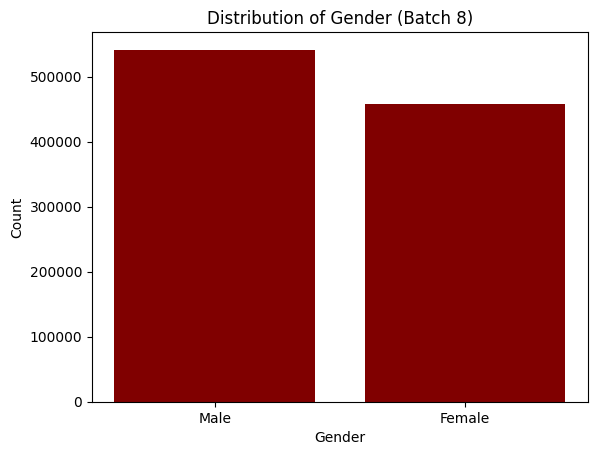

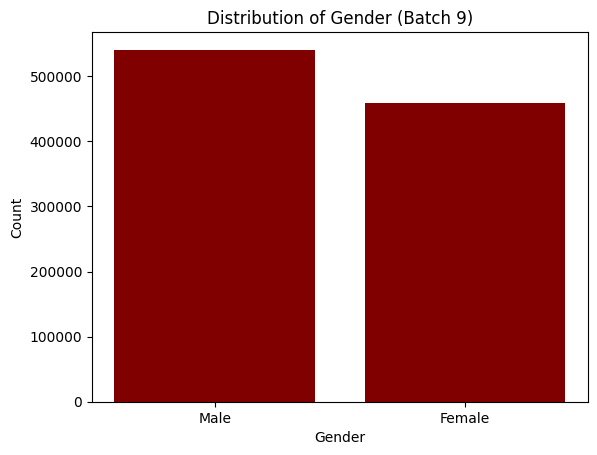

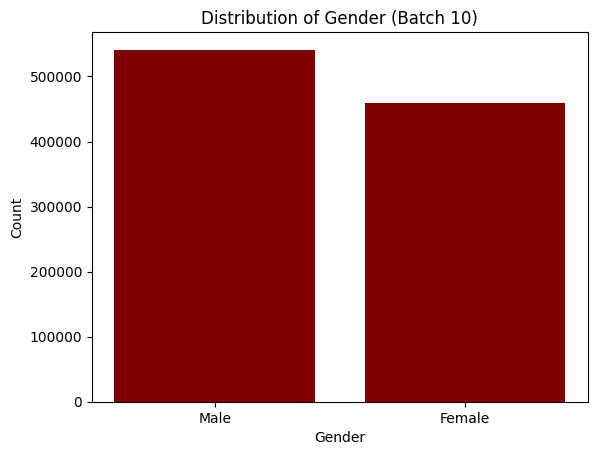

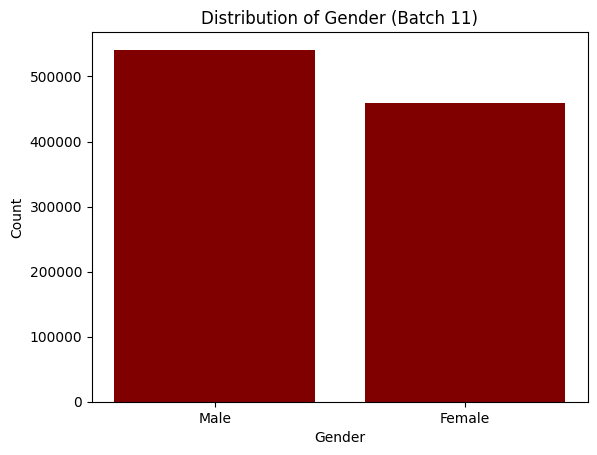

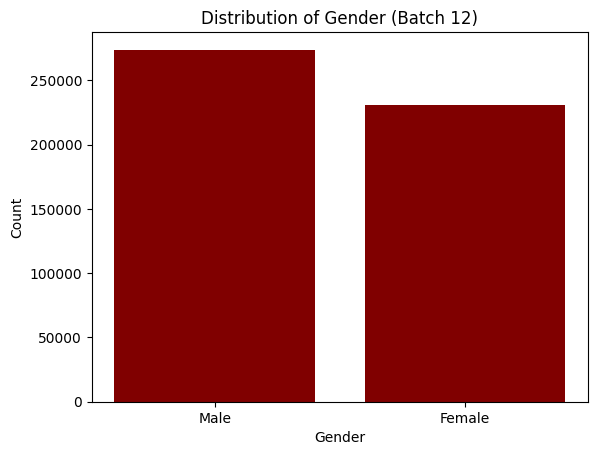

In [64]:
batch_size = 1000000
num_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)
for i in range(num_batches):
    start = i * batch_size
    end = start + batch_size
    batch = df[start:end]
    gender_counts = batch['Gender'].value_counts()
    plt.bar(gender_counts.index, gender_counts.values, color='maroon')
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.title(f"Distribution of Gender (Batch {i + 1})")
    plt.show()

The Graphs above tells us about the distribution of males and females in our dataset. We used batches to prevent load on the cpu

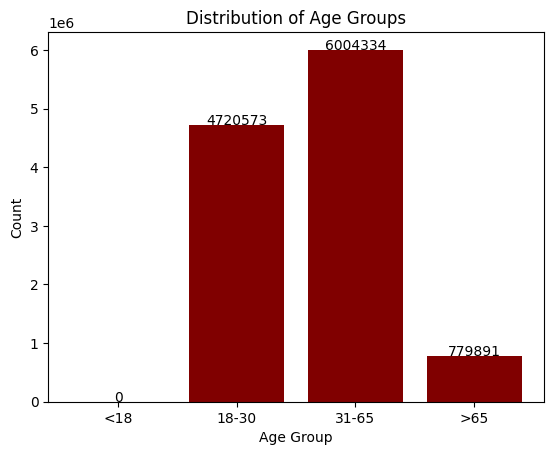

In [65]:
bins = [0, 18, 30, 65, float('inf')] 
labels = ['<18', '18-30', '31-65', '>65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['Age Group'].value_counts().sort_index()
plt.bar(age_group_counts.index, age_group_counts.values, color='maroon')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

We used data aggregation and group People based on their age groups.The Bar graph showing distribution of various age groups

In [66]:
df['Driving_License'].unique()

array([1, 0])

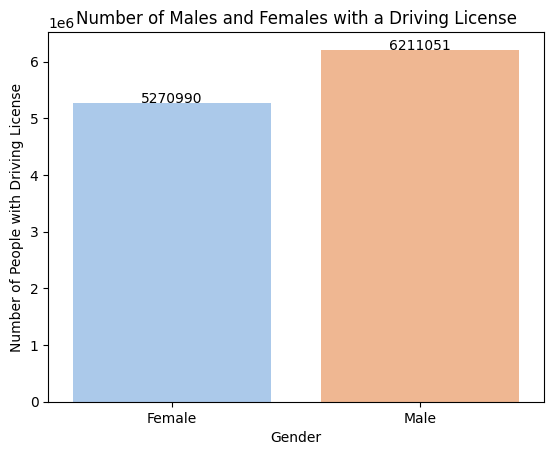

In [67]:
driving_license_counts = df[df['Driving_License'] == 1].groupby('Gender').size().reset_index(name='Count')
sns.barplot(x='Gender', y='Count', data=driving_license_counts, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Number of People with Driving License')
plt.title('Number of Males and Females with a Driving License')
for index, value in enumerate(driving_license_counts['Count']):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

From the above graph we found total 11,482,041 out of 11504798 people have driving license out of which 5270990 are males and 6211051 are females 

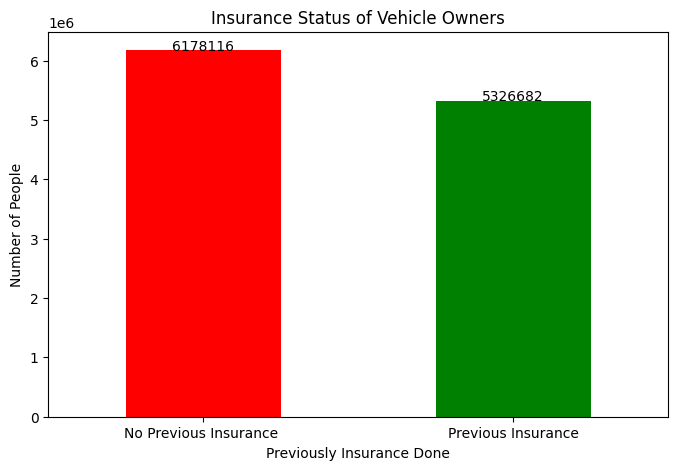

In [68]:
insurance_count = df['Previously_Insured'].value_counts()
plt.figure(figsize=(8, 5))
insurance_count.plot(kind='bar', color=['red', 'green'])
plt.title('Insurance Status of Vehicle Owners')
plt.xlabel('Previously Insurance Done')
plt.ylabel('Number of People')
for index, value in enumerate(insurance_count):
    plt.text(index, value + 1, str(value), ha='center')
plt.xticks([0, 1], labels=['No Previous Insurance ', 'Previous Insurance'],rotation=0)
plt.show()

From the above bar plot it is clear that a total of 5326682 got their vehicle previously insuranced  

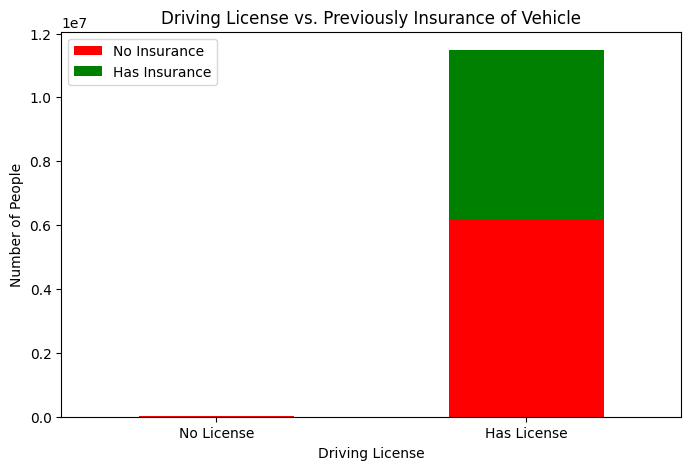

In [69]:
grouped_data = df.groupby(['Driving_License', 'Previously_Insured']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Driving License vs. Previously Insurance of Vehicle')
plt.xlabel('Driving License')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['No License', 'Has License'], rotation=0)
plt.legend(['No Insurance', 'Has Insurance'])
plt.show()

From the above stacked graph it is clear that no peron without license got insurance but yeah their are people who got driving license but ditn't have any insurance

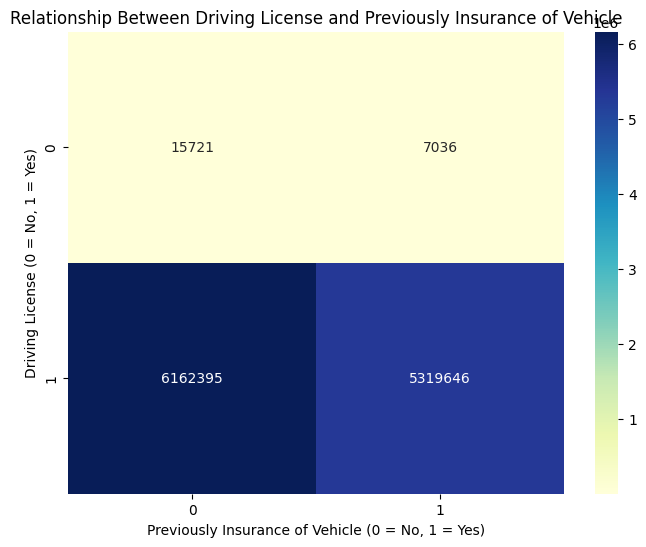

	 Insights of the contingency table
Previously_Insured        0        1       All
Driving_License                               
0                     15721     7036     22757
1                   6162395  5319646  11482041
All                 6178116  5326682  11504798


In [70]:
contingency_table = pd.crosstab(df['Driving_License'], df['Previously_Insured'], margins=True)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship Between Driving License and Previously Insurance of Vehicle')
plt.xlabel('Previously Insurance of Vehicle (0 = No, 1 = Yes)')
plt.ylabel('Driving License (0 = No, 1 = Yes)')
plt.show()
print(f'\t Insights of the contingency table\n{contingency_table}')

Total  of 22,757 peope with no driving license out of which 15,721 got no previous insurance. 11,482,041 have driving license out of which 6,162,395 got no previous insurance 


In [71]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age Group
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,18-30
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,31-65
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,18-30
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,31-65
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,31-65


In [76]:
newdf=df[['Driving_License','Previously_Insured','Age Group','Vehicle_Age']].copy()
newdf.head()

,Driving_License,Previously_Insured,Age Group,Vehicle_Age
0,1,0,18-30,1-2 Year
1,1,0,31-65,> 2 Years
2,1,1,18-30,< 1 Year
3,1,0,31-65,1-2 Year
4,1,1,31-65,1-2 Year


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


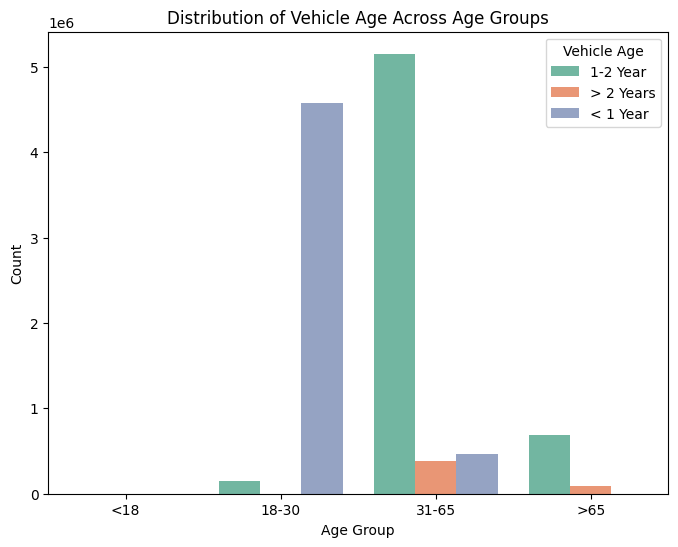

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', hue='Vehicle_Age', data=newdf,palette='Set2')
plt.title('Distribution of Vehicle Age Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Vehicle Age')
plt.show()

Younger person Between age group of 18-30 tends to have new latest model and adult age group tends to use vehivle not neither new nor old  vehicles. Whereas old people hardly drives and if yes they drive old model or same as that of adult age people

/tmp/ipykernel_36/493544295.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driving_license_gender = df[df['Driving_License'] == 1].groupby('Age Group').size().reset_index(name='Count')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


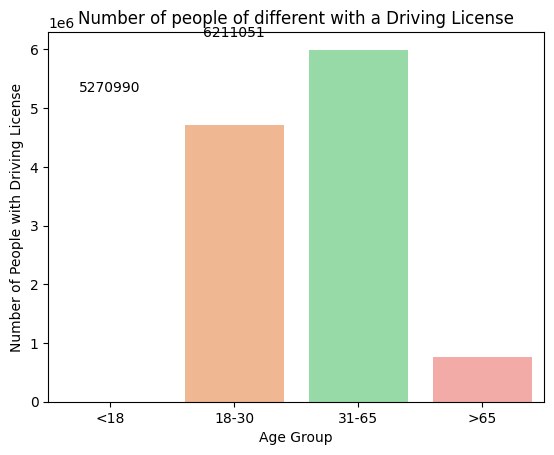

In [87]:
driving_license_gender = df[df['Driving_License'] == 1].groupby('Age Group').size().reset_index(name='Count')
sns.barplot(x='Age Group', y='Count', data=driving_license_gender, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Number of People with Driving License')
plt.title('Number of people of different with a Driving License')
for index, value in enumerate(driving_license_counts['Count']):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

Above distribution showing  people of different age groups having license middle adult age tends to have maximum driving license followed by new youth and old age

/tmp/ipykernel_36/1630626878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = newdf.groupby(['Driving_License', 'Age Group', 'Vehicle_Age']).size().reset_index(name='Count')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When g

<Figure size 1000x600 with 0 Axes>

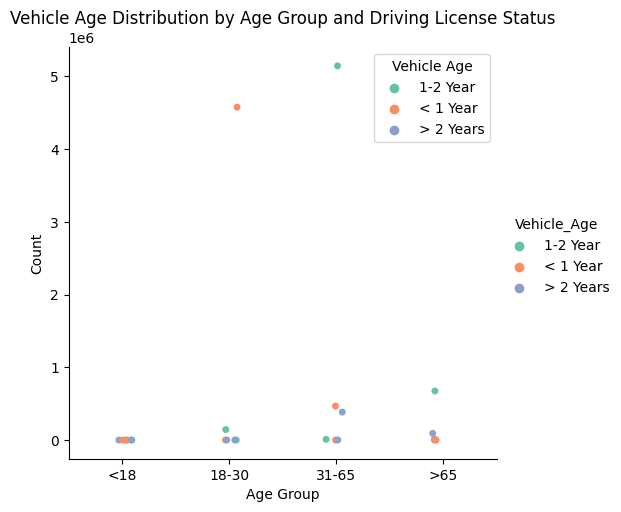

In [93]:
aggregated_data = newdf.groupby(['Driving_License', 'Age Group', 'Vehicle_Age']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.catplot(x='Age Group', y='Count', hue='Vehicle_Age', data=aggregated_data, palette='Set2')
plt.title('Vehicle Age Distribution by Age Group and Driving License Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Vehicle Age')
plt.show()

Aggregated Catplot of Age Group Count and Vehicle Age